In [ ]:
rom PySide2.QtCore import QThread, SIGNAL
import cv2
import numpy as np
import imutils
import time

In [11]:
from PySide2.QtCore import QThread, SIGNAL
import cv2
import numpy as np
import imutils
import time



def crop(image, r):
    return image[r[1]:r[1] + r[3], r[0]:r[0]+r[2]]

modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap = cv2.VideoCapture(0)
cap.set(3, 640)  # set Width
cap.set(4, 480)  # set Height
count = 0
detections = []


while True:
    ret, frame = cap.read()
    frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    (h, w) = frame.shape[:2]
    # blobImage convert RGB (104.0, 177.0, 123.0)
    blob = cv2.dnn.blobFromImage(cv2.resize(
        frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    for i in range(0, detections.shape[2]):

        # extract the confidence and prediction
        confidence = detections[0, 0, i, 2]
        if confidence < 0.99:
            continue
        else:
            cv2.imwrite('img.jpg', frame)
            time.sleep(0.01)
            # self.emit(SIGNAL('detect(QString)'), 'DETECTED')
            # print('detected')
            # croped_image = crop(frame, (startX, startY, endX, endY))
            # cv2.imwrite('img_{}.jpg'.format(time.time()), frame)


        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)

    cv2.imshow("Img", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

time.sleep(5)
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()




In [2]:
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [5]:
frame

In [6]:
detections.shape

(1, 1, 200, 7)

In [12]:
confidence

0.0

In [13]:
box

array([126.06316805,  71.75640464, 229.10842896, 215.51018357])

In [18]:
from PySide2.QtCore import QThread, SIGNAL
import cv2
import numpy as np
import imutils
import time
from PySide2.QtWidgets import QApplication, QVBoxLayout, QMainWindow, QWidget, QSizePolicy, QInputDialog


def crop(image, r):
    return image[r[1]:r[1] + r[3], r[0]:r[0]+r[2]]


modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap = cv2.VideoCapture(0)
cap.set(3, 640)  # set Width
cap.set(4, 480)  # set Height
count = 0
detections = []


img = cv2.imread("alper-personality-face.jpg")
img = cv2.resize(img, (640, 480))
frame = img
while True:
    # ret, frame = cap.read()
    frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    (h, w) = frame.shape[:2]
    # blobImage convert RGB (104.0, 177.0, 123.0)
    blob = cv2.dnn.blobFromImage(cv2.resize(
        frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    lst = []
    for i in range(0, detections.shape[2]):

        # extract the confidence and prediction
        confidence = detections[0, 0, i, 2]
        if confidence < 0.99:
            continue
        else:
            cv2.imwrite('img.jpg', frame)
            time.sleep(0.01)
            # self.emit(SIGNAL('detect(QString)'), 'DETECTED')
            # print('detected')
            # croped_image = crop(frame, (startX, startY, endX, endY))
            # cv2.imwrite('img_{}.jpg'.format(time.time()), frame)
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            
            (startX, startY, endX, endY) = box.astype("int")
            lst.append([startX, startY, endX -startX, endY-startY])
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
            # for i in range(len(lst)):
            croped_image = crop(frame, [startX, startY, endX - startX, endY-startY])
            cv2.imwrite("faces/face_{}.jpg".format(i), croped_image)
    cv2.imshow("Img", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    break

time.sleep(5)
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()


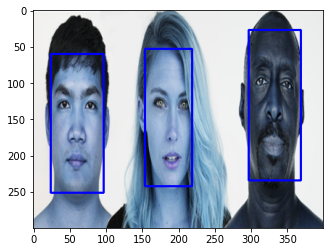

In [6]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [40]:
box

array([297.53894806,  27.81119049, 369.40150261, 234.47706699])

In [29]:
[int(i) for i in lst[0]]

[24, 60, 97, 251]

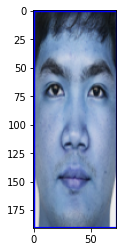

In [7]:
plt.imshow(crop(frame,lst[0]))

In [10]:
import cv2  # Not actually necessary if you just want to create an image.
import numpy as np
blank_image = np.zeros((640, 480, 3), np.uint8)


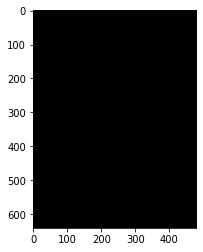

In [12]:
plt.imshow(blank_image)
